In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import json
import os

In [2]:
pd.set_option('display.max_columns', None)

plt.rcParams.update({'font.size': 20})

from itertools import product

# Load Results

In [3]:
with open('Logs/spinemet_results.json','r') as json_file:
    spinemet_results = json.load(json_file)
    
with open('Logs/spinemet_selection_results.json','r') as json_file:
    spinemet_selection_results = json.load(json_file)

# Comparison

In [4]:
models = ["CoxPH","SurvivalTree","RandomSurvivalForest","GradientBoosting","MDN"]
colors = ["green","purple","orange","red","blue"]
opts = [True,False]
typs = ["5Fold","Hold-out"]
scores = ["UnoC","iBrier","AUROC","LogRank"]
trials = list(product(models,opts,typs,scores))

spinemet_results_plot  = {"Model":[],
                      "Color":[],
                      "Type":[],
                      "Score":[],
                      "mean":[],
                      "std":[]}

for trial in trials:
    spinemet_results_plot["Model"].append(f"{trial[0]} " + ["$^{^{LogRank}}$" if trial[1] == True else ""][0])
    spinemet_results_plot["Color"].append([item[1] for item in zip(models,colors) if item[0] == trial[0]][0])
    spinemet_results_plot["Type"].append(trial[2])
    if trial[3] == "iBrier":
        spinemet_results_plot["Score"].append("$\\leftarrow$ " + trial[3])
    else:
        spinemet_results_plot["Score"].append(trial[3] + " $\\rightarrow$")
    for i in range(len(spinemet_results["Model"])):
        if (spinemet_results["Model"][i] == trial[0]) & (spinemet_results["Optimized_LogRank"][i] == trial[1]) & (spinemet_results["T_max"][i] == 1.0) & (spinemet_results["Uncensored_Reduction"][i] == 1.0):
            if trial[2] == "5Fold":
                spinemet_results_plot["mean"].append(spinemet_results[trial[2]][trial[3]]["mean"][i])
                spinemet_results_plot["std"].append(1.96*spinemet_results[trial[2]][trial[3]]["std"][i]/np.sqrt(5))
            else:
                spinemet_results_plot["mean"].append(spinemet_results[trial[2]][trial[3]][i])
                spinemet_results_plot["std"].append(0)
            
spinemet_results_plot = pd.DataFrame.from_dict(spinemet_results_plot)

In [5]:
models = ["CoxPH","SurvivalTree","RandomSurvivalForest","GradientBoosting","MDN"]
colors = ["green","purple","orange","red","blue"]
opts = [True,False]
typs = ["5Fold","Hold-out"]
scores = ["UnoC","iBrier","AUROC","LogRank"]
trials = list(product(models,opts,typs,scores))

spinemet_selection_results_plot  = {"Model":[],
                      "Color":[],
                      "Type":[],
                      "Score":[],
                      "mean":[],
                      "std":[]}

for trial in trials:
    spinemet_selection_results_plot["Model"].append(f"{trial[0]} " + ["$^{^{LogRank}}$" if trial[1] == True else ""][0])
    spinemet_selection_results_plot["Color"].append([item[1] for item in zip(models,colors) if item[0] == trial[0]][0])
    spinemet_selection_results_plot["Type"].append(trial[2])
    if trial[3] == "iBrier":
        spinemet_selection_results_plot["Score"].append("$\\leftarrow$ " + trial[3])
    else:
        spinemet_selection_results_plot["Score"].append(trial[3] + " $\\rightarrow$")
    for i in range(len(spinemet_results["Model"])):
        if (spinemet_selection_results["Model"][i] == trial[0]) & (spinemet_selection_results["Optimized_LogRank"][i] == trial[1]) & (spinemet_selection_results["T_max"][i] == 1.0) & (spinemet_selection_results["Uncensored_Reduction"][i] == 1.0):
            if trial[2] == "5Fold":
                spinemet_selection_results_plot["mean"].append(spinemet_selection_results[trial[2]][trial[3]]["mean"][i])
                spinemet_selection_results_plot["std"].append(1.96*spinemet_selection_results[trial[2]][trial[3]]["std"][i]/np.sqrt(5))
            else:
                spinemet_selection_results_plot["mean"].append(spinemet_selection_results[trial[2]][trial[3]][i])
                spinemet_selection_results_plot["std"].append(0)
            
spinemet_selection_results_plot = pd.DataFrame.from_dict(spinemet_selection_results_plot)

## 5Fold

C:\Users\kutato17\AppData\Local\Temp\4\ipykernel_29052\3468583086.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = "left")
C:\Users\kutato17\AppData\Local\Temp\4\ipykernel_29052\3468583086.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = "left")
C:\Users\kutato17\AppData\Local\Temp\4\ipykernel_29052\3468583086.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = "left")
C:\Users\kutato17\AppData\Local\Temp\4\ipykernel_29052\3468583086.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = 

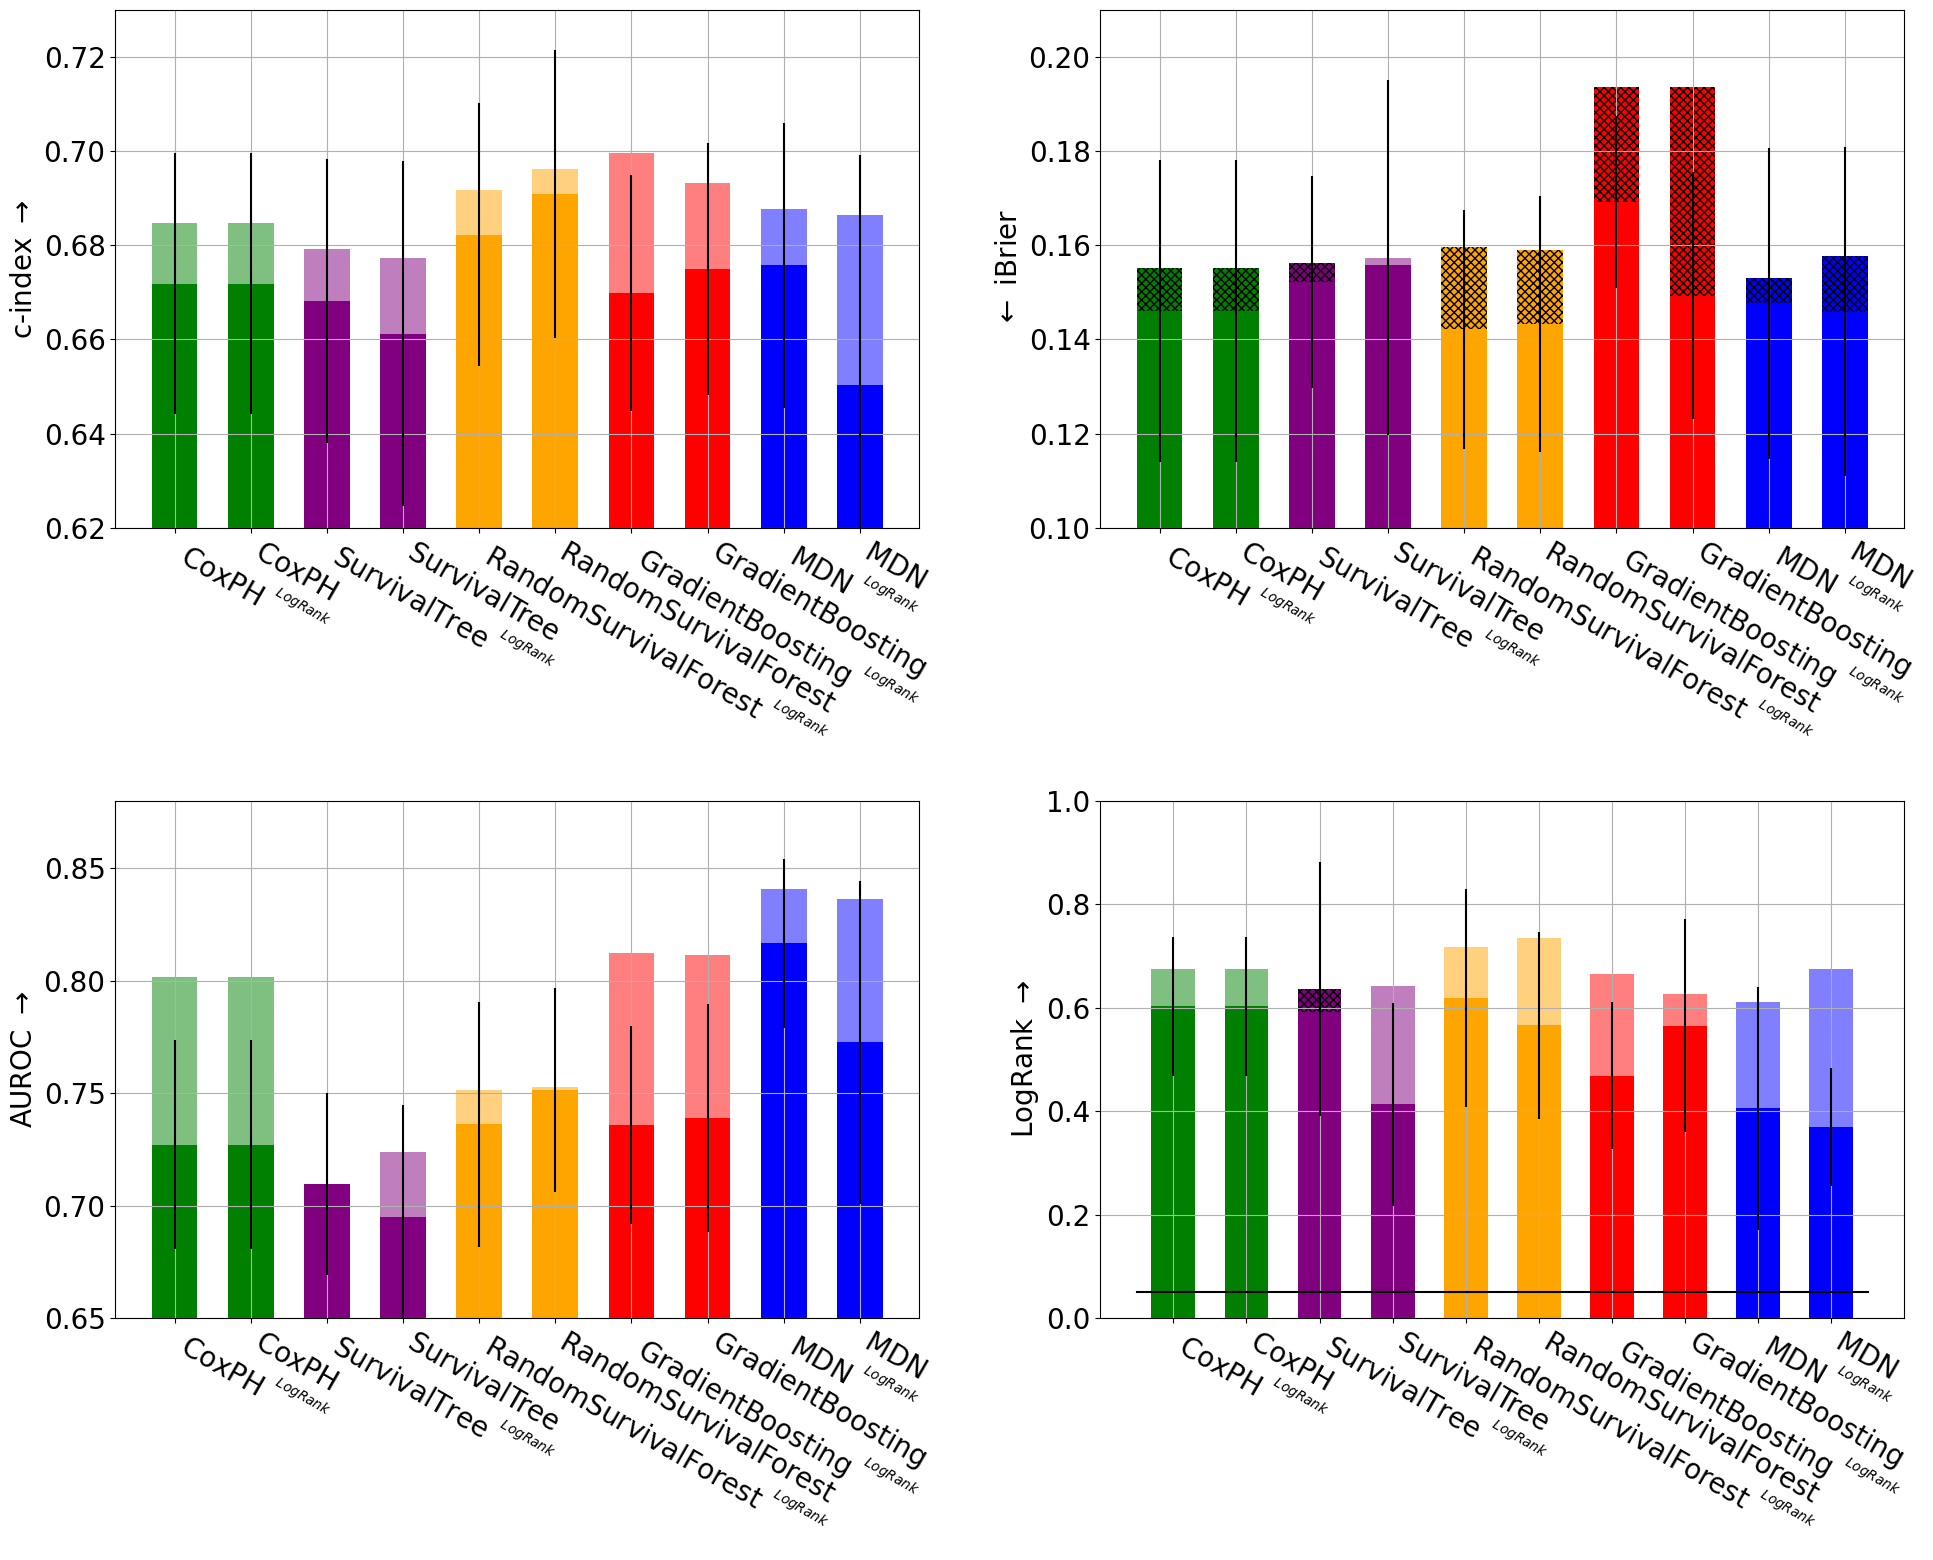

In [8]:
typ = "5Fold"

fig, axs = plt.subplots(2,2,figsize=(20,16))
scores = ["UnoC $\\rightarrow$","$\\leftarrow$ iBrier","AUROC $\\rightarrow$","LogRank $\\rightarrow$"]
locs = [[0,0],[0,1],[1,0],[1,1]]
ylims = [[0.62,0.73],[0.1,0.21],[0.65,0.88],[0,1]]

for scr,loc,ylim in zip(scores,locs,ylims):
    for a1,a2 in zip(spinemet_results_plot[(spinemet_results_plot.Type == typ) & (spinemet_results_plot.Score == scr)].iterrows(),spinemet_selection_results_plot[(spinemet_selection_results_plot.Type == typ) & (spinemet_selection_results_plot.Score == scr)].iterrows()):
        row1 = a1[1]
        row2 = a2[1]
        if not scr == "$\\leftarrow$ iBrier":
            if row2["mean"] >= row1["mean"]:
                b2 = axs[loc[0]][loc[1]].bar(row2.Model, height = row2["mean"],width = 0.6, yerr = 0, color = row2.Color, hatch= "", alpha = 0.5)
                b1 = axs[loc[0]][loc[1]].bar(row1.Model, height = row1["mean"],width = 0.6, yerr = row1["std"], color = row1.Color)
            else:
                b1 = axs[loc[0]][loc[1]].bar(row1.Model, height = row1["mean"],width = 0.6, yerr = row1["std"], color = row1.Color, hatch= "xxxx")
                b2 = axs[loc[0]][loc[1]].bar(row2.Model, height = row2["mean"],width = 0.6, yerr = 0, color = row2.Color)
        else:
            if row1["mean"] >= row2["mean"]:
                b1 = axs[loc[0]][loc[1]].bar(row1.Model, height = row1["mean"],width = 0.6, yerr = row1["std"], color = row1.Color, hatch= "", alpha = 0.5)
                b2 = axs[loc[0]][loc[1]].bar(row2.Model, height = row2["mean"],width = 0.6, yerr = 0, color = row2.Color) 
            else:
                b2 = axs[loc[0]][loc[1]].bar(row2.Model, height = row2["mean"],width = 0.6, yerr = 0, color = row2.Color, hatch= "xxxx")
                b1 = axs[loc[0]][loc[1]].bar(row1.Model, height = row1["mean"],width = 0.6, yerr = row1["std"], color = row1.Color)           
    if scr == "LogRank $\\rightarrow$":
        #axs[loc[0]][loc[1]].set_yscale("log")
        axs[loc[0]][loc[1]].plot(np.linspace(-0.5,9.5,100),0.05*np.ones(100),marker = "", color = "black", label = "LogRank success > 0.05")
    #axs[loc[0]][loc[1]].tick_params(axis='x', labelrotation=-45)
    axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = "left")
    if scr == "UnoC $\\rightarrow$":
        axs[loc[0]][loc[1]].set_ylabel("c-index $\\rightarrow$")
    else:
        axs[loc[0]][loc[1]].set_ylabel(scr)
    axs[loc[0]][loc[1]].set_ylim((ylim[0],ylim[1]))
    axs[loc[0]][loc[1]].grid("x")

#_ = fig.suptitle(f"Model improvements when using the five selected features on {typ} scores\n(Crosshatch pattern denotes deterioration)")
fig.tight_layout()#rect=[0, 0.03, 1, 0.99])

## Hold-out

C:\Users\kutato17\AppData\Local\Temp\4\ipykernel_29052\1707600169.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = "left")
C:\Users\kutato17\AppData\Local\Temp\4\ipykernel_29052\1707600169.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = "left")
C:\Users\kutato17\AppData\Local\Temp\4\ipykernel_29052\1707600169.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = "left")
C:\Users\kutato17\AppData\Local\Temp\4\ipykernel_29052\1707600169.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = 

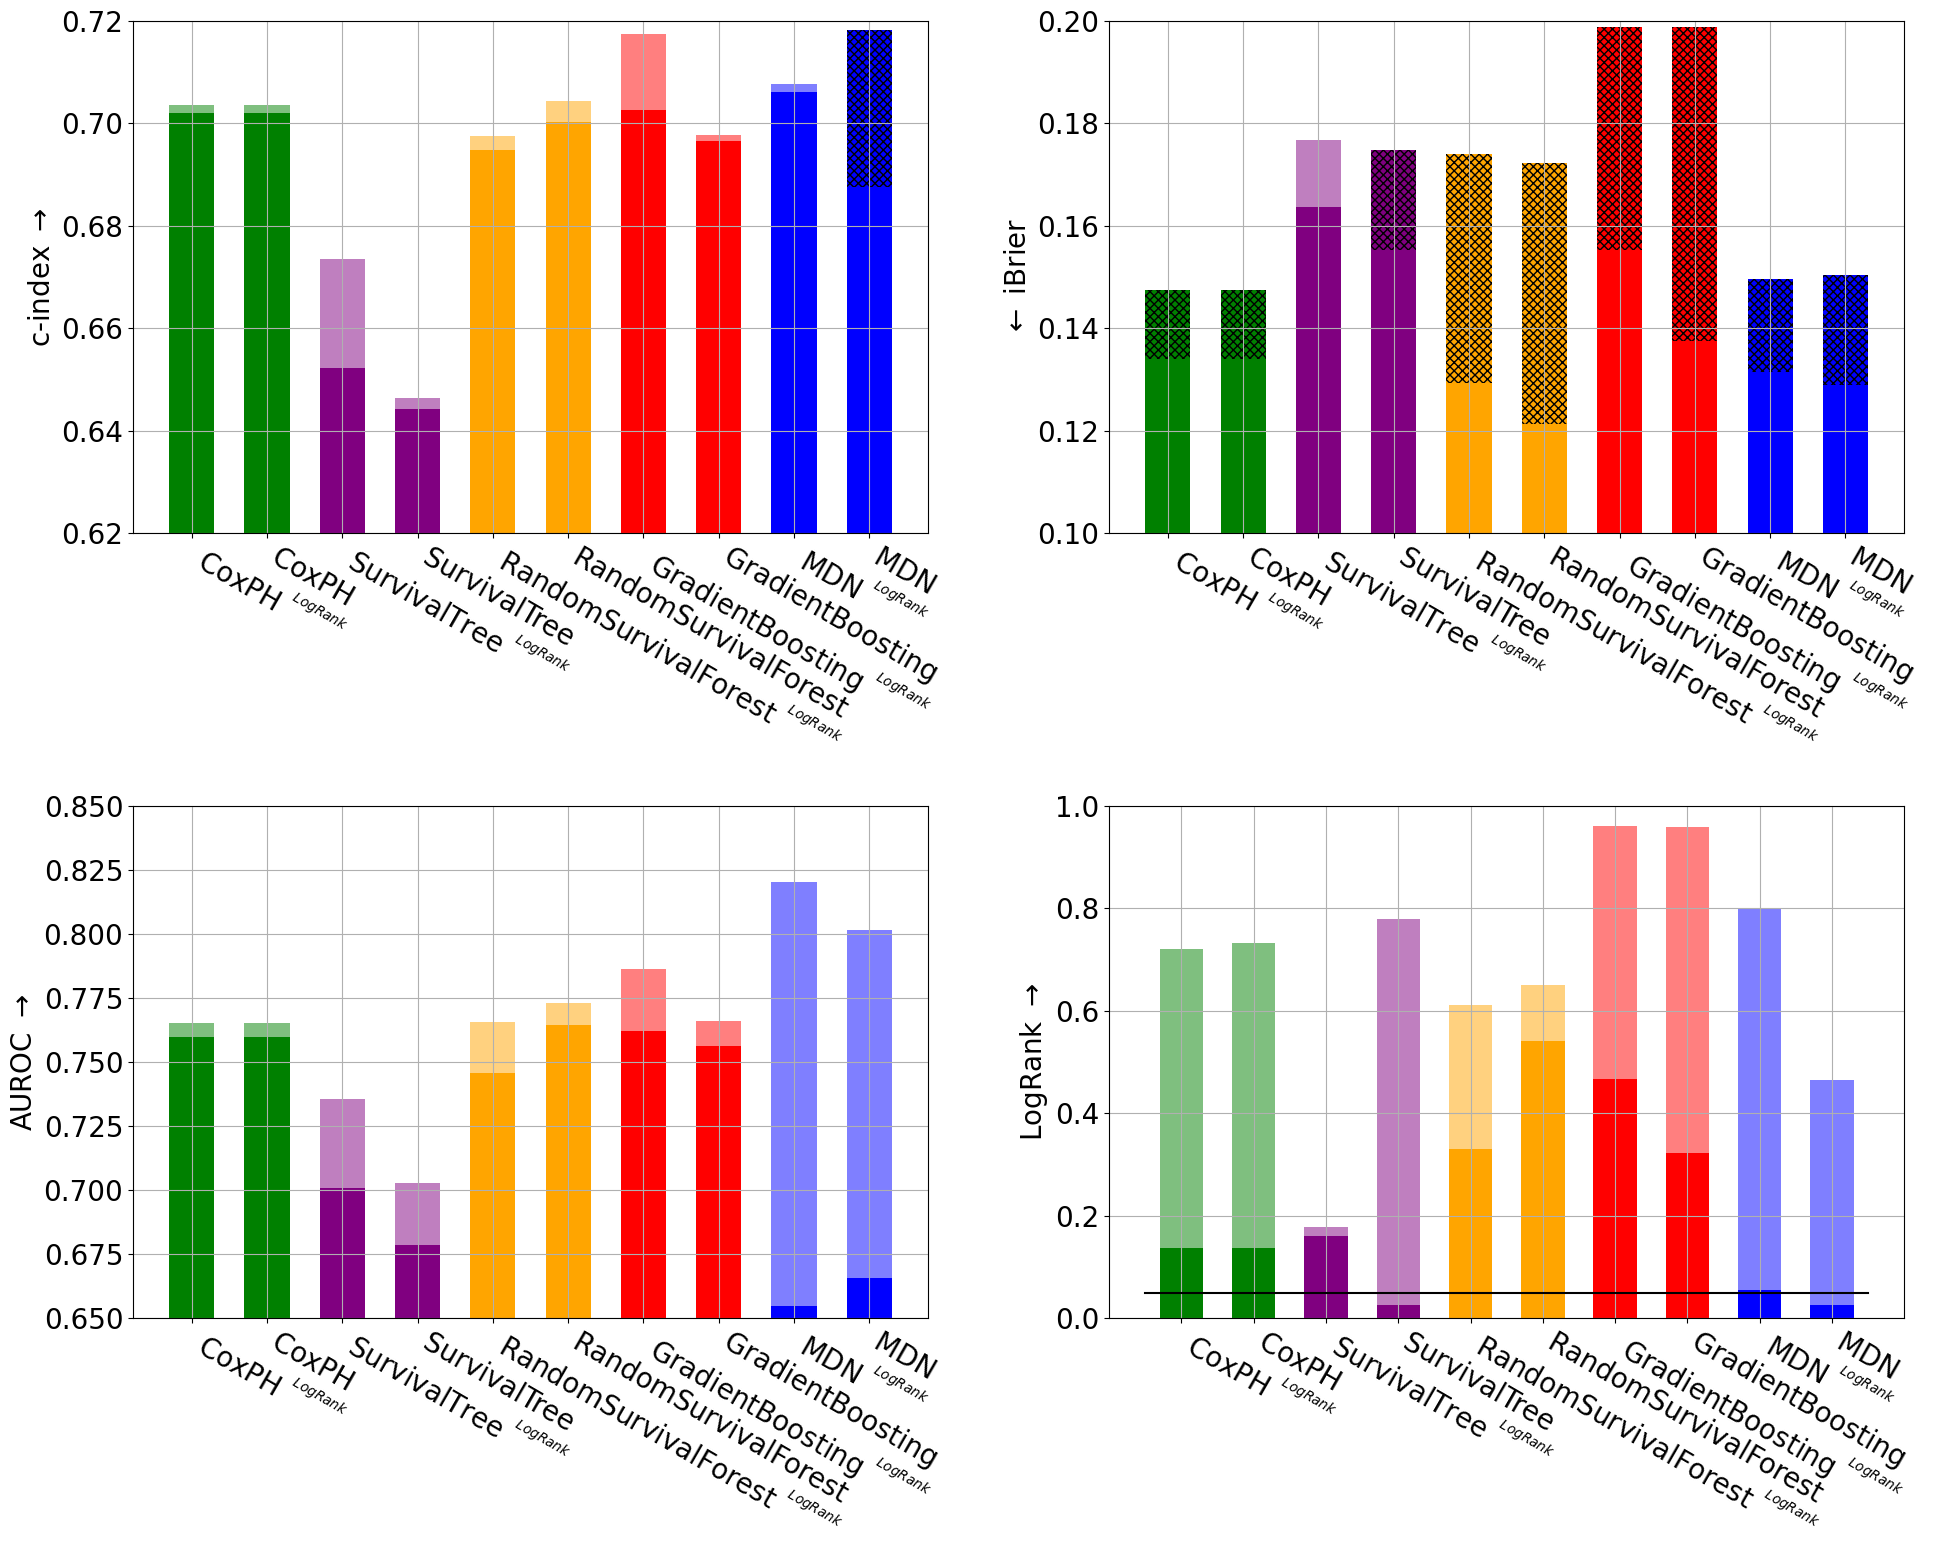

In [9]:
typ = "Hold-out"

fig, axs = plt.subplots(2,2,figsize=(20,16))
#fig.delaxes(axs[2][1])
scores = ["UnoC $\\rightarrow$","$\\leftarrow$ iBrier","AUROC $\\rightarrow$","LogRank $\\rightarrow$"]
locs = [[0,0],[0,1],[1,0],[1,1]]
ylims = [[0.62,0.72],[0.1,0.2],[0.65,0.85],[0,1]]

for scr,loc,ylim in zip(scores,locs,ylims):
    for a1,a2 in zip(spinemet_results_plot[(spinemet_results_plot.Type == typ) & (spinemet_results_plot.Score == scr)].iterrows(),spinemet_selection_results_plot[(spinemet_selection_results_plot.Type == typ) & (spinemet_selection_results_plot.Score == scr)].iterrows()):
        row1 = a1[1]
        row2 = a2[1]
        if not scr == "$\\leftarrow$ iBrier":
            if row2["mean"] >= row1["mean"]:
                b2 = axs[loc[0]][loc[1]].bar(row2.Model, height = row2["mean"],width = 0.6, yerr = 0, color = row2.Color, hatch= "", alpha = 0.5)
                b1 = axs[loc[0]][loc[1]].bar(row1.Model, height = row1["mean"],width = 0.6, yerr = row1["std"], color = row1.Color)
            else:
                b1 = axs[loc[0]][loc[1]].bar(row1.Model, height = row1["mean"],width = 0.6, yerr = row1["std"], color = row1.Color, hatch= "xxxx")
                b2 = axs[loc[0]][loc[1]].bar(row2.Model, height = row2["mean"],width = 0.6, yerr = 0, color = row2.Color)
        else:
            if row1["mean"] >= row2["mean"]:
                b1 = axs[loc[0]][loc[1]].bar(row1.Model, height = row1["mean"],width = 0.6, yerr = row1["std"], color = row1.Color, hatch= "", alpha = 0.5)
                b2 = axs[loc[0]][loc[1]].bar(row2.Model, height = row2["mean"],width = 0.6, yerr = 0, color = row2.Color) 
            else:
                b2 = axs[loc[0]][loc[1]].bar(row2.Model, height = row2["mean"],width = 0.6, yerr = 0, color = row2.Color, hatch= "xxxx")
                b1 = axs[loc[0]][loc[1]].bar(row1.Model, height = row1["mean"],width = 0.6, yerr = row1["std"], color = row1.Color)           
    if scr == "LogRank $\\rightarrow$":
        #axs[loc[0]][loc[1]].set_yscale("log")
        axs[loc[0]][loc[1]].plot(np.linspace(-0.5,9.5,100),0.05*np.ones(100),marker = "", color = "black", label = "LogRank success > 0.05")
    #axs[loc[0]][loc[1]].tick_params(axis='x', labelrotation=-45)
    axs[loc[0]][loc[1]].set_xticklabels(spinemet_results_plot.Model.unique(),rotation = -30, ha = "left")
    if scr == "UnoC $\\rightarrow$":
        axs[loc[0]][loc[1]].set_ylabel("c-index $\\rightarrow$")
    else:
        axs[loc[0]][loc[1]].set_ylabel(scr)
    axs[loc[0]][loc[1]].set_ylim((ylim[0],ylim[1]))
    axs[loc[0]][loc[1]].grid("x")

#_ = fig.suptitle(f"Model improvements when using the five selected features on {typ} scores\n(Crosshatch pattern denotes deterioration)")
fig.tight_layout()#rect=[0, 0.03, 1, 0.99])